In [9]:
import numpy as np
import pandas as pd
import pickle
import math
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_pickle('X_train.pkl')
X_cv = pd.read_pickle('X_cv.pkl')
X_test = pd.read_pickle('X_test.pkl')

In [3]:
y_train = X_train['sales']
y_cv = X_cv['sales']
y_test = X_test['sales']

# We are drpping the features which are not required.
X_train.drop(['sales'],axis = 1,inplace = True)
X_cv.drop(['sales'],axis=1,inplace = True)
X_test.drop(['sales'],axis = 1,inplace = True)

print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape, y_test.shape)

(13781480, 28) (13781480,)
(853720, 28) (853720,)
(853720, 28) (853720,)


In [4]:
for i in range(5):
    learn_rate = np.round(np.random.rand()/10,3)
    num_leaves = np.random.randint(30,150)
    min_data_in_leaf = np.random.randint(50,150)
    model6 = LGBMRegressor(learning_rate=learn_rate ,num_leaves=num_leaves , min_data_in_leaf=min_data_in_leaf)
    model6.fit(X_train, y_train)
    y_pred_train = model6.predict(X_train)
    y_pred = model6.predict(X_cv)
    rmse = math.sqrt(mse(y_train,y_pred_train))
    print(f"Train error with learn_rate: {learn_rate}, num_leaves:{num_leaves}, min_data_in_leaf: {min_data_in_leaf} = {rmse}")
    rmse = math.sqrt(mse(y_cv,y_pred))
    print(f"Test error with learn_rate: {learn_rate}, num_leaves:{num_leaves}, min_data_in_leaf: {min_data_in_leaf} = {rmse}")
    print('*'*100)

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
Train error with learn_rate: 0.054, num_leaves:36, min_data_in_leaf: 61 = 1.7524255284132046
Test error with learn_rate: 0.054, num_leaves:36, min_data_in_leaf: 61 = 1.7492825654000697
****************************************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=107, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=107
Train error with learn_rate: 0.07, num_leaves:139, min_data_in_leaf: 107 = 1.6914946919047131
Test error with learn_rate: 0.07, num_leaves:139, min_data_in_leaf: 107 = 1.776521632865789
****************************************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
Train error with learn_rate: 0.05, num_leaves:135, min_data

In [5]:
#after checking mutliple parameters below values have given best results
learn_rate = 0.034
num_leaves = 78
min_data_in_leaf = 67
model6 = LGBMRegressor(learning_rate=learn_rate ,num_leaves=num_leaves , min_data_in_leaf=min_data_in_leaf)
model6.fit(X_train,y_train)
y_pred_train = model6.predict(X_train)
y_pred = model6.predict(X_test)
rmse = math.sqrt(mse(y_train,y_pred_train))
print(f"Train error with learn_rate: {learn_rate}, num_leaves:{num_leaves}, min_data_in_leaf: {min_data_in_leaf} = {rmse}")
rmse = math.sqrt(mse(y_test,y_pred))
print(f"Test error with learn_rate: {learn_rate}, num_leaves:{num_leaves}, min_data_in_leaf: {min_data_in_leaf} = {rmse}")
print('*'*100)

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
Train error with learn_rate: 0.034, num_leaves:78, min_data_in_leaf: 67 = 1.7558997825731877
Test error with learn_rate: 0.034, num_leaves:78, min_data_in_leaf: 67 = 1.7497339806829757
****************************************************************************************************


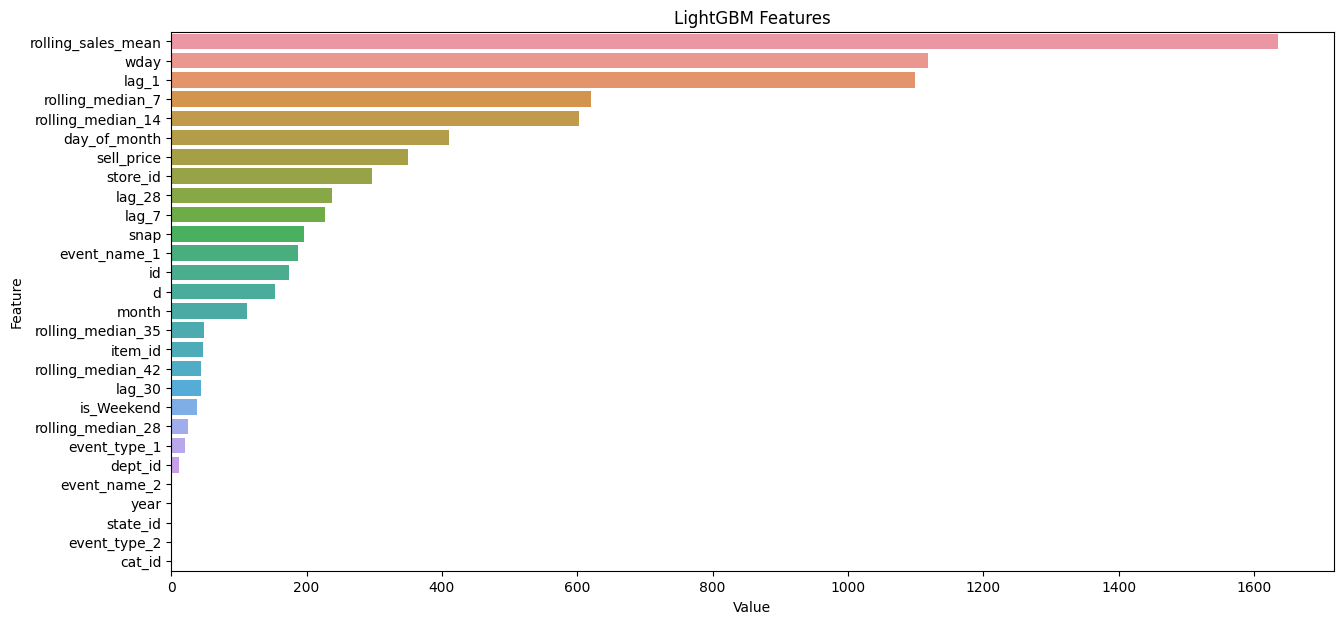

In [12]:
#feature Importance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(model6.feature_importances_,X_train.columns)), 
                           columns=['Value','Feature'])
plt.figure(figsize=(15, 7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.show()